In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [2]:
# Create engine to connect to SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Reflect the tables from the database
Base = automap_base()
Base.prepare(engine, reflect=True)

# Check the available tables
Base.classes.keys()

C:\Users\User\AppData\Local\Temp\ipykernel_14376\2655925985.py:6: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


['measurement', 'station']

In [3]:
# Save references to the tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session to link Python with the database
session = Session(engine)

# Inspect the columns in each table
inspector = inspect(engine)

# Inspect Measurement table columns
measurement_columns = inspector.get_columns('measurement')
for col in measurement_columns:
    print(col['name'], col['type'])

# Inspect Station table columns
station_columns = inspector.get_columns('station')
for col in station_columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


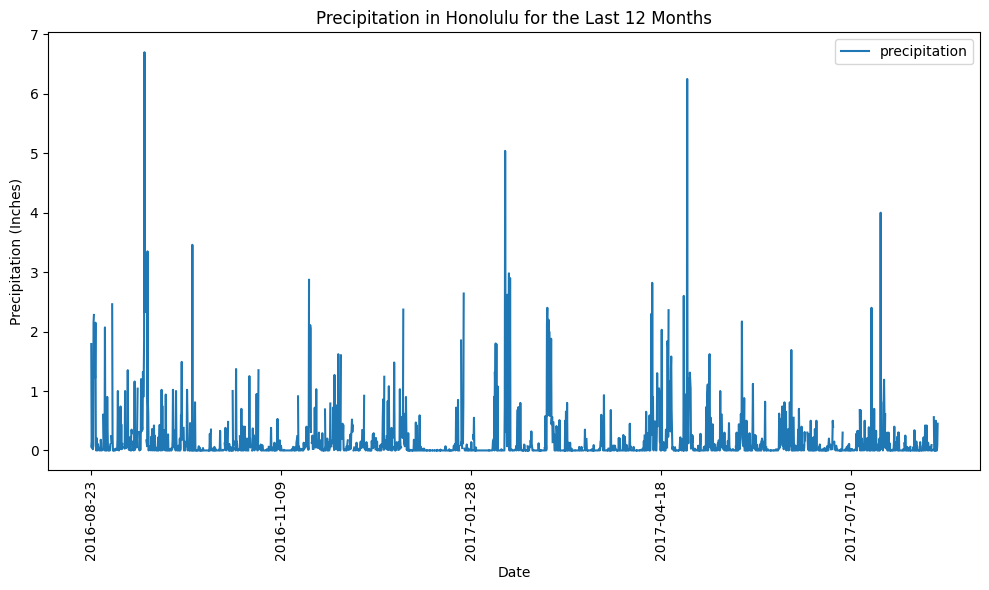

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [4]:
# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

# Get the previous 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Load query results into a DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)

# Sort the DataFrame by date
precipitation_df.sort_values('date', inplace=True)

# Plot the results
precipitation_df.plot(rot=90, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('Precipitation in Honolulu for the Last 12 Months')
plt.tight_layout()
plt.show()

# Print summary statistics for precipitation data
precipitation_df.describe()

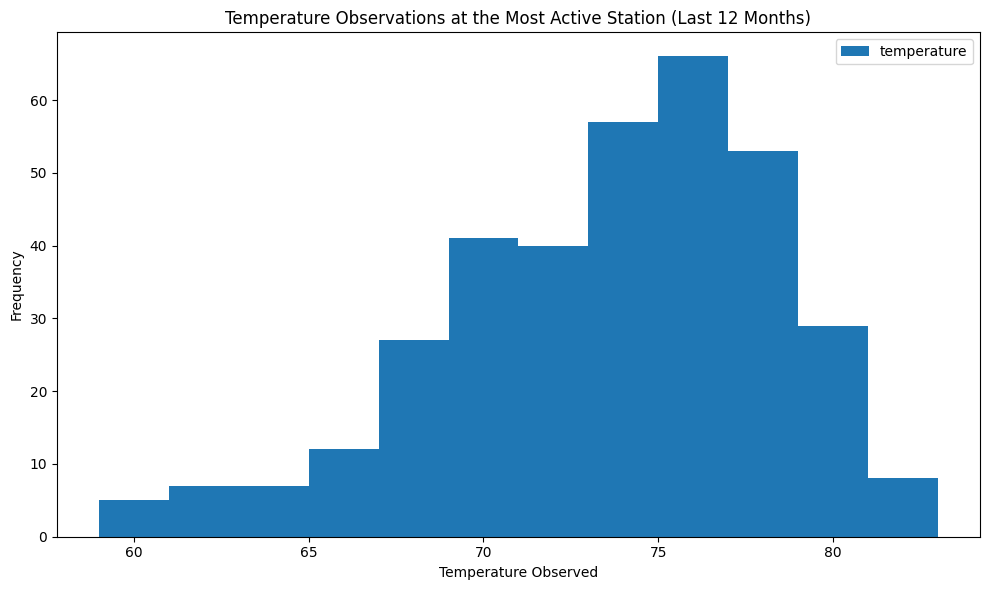

In [5]:
# Query the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

# List the stations and their observation counts in descending order
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

# Find the station with the greatest number of observations
most_active_station = most_active_stations[0][0]

# Query the minimum, maximum, and average temperatures for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
temperature_stats

# Query the last 12 months of temperature observation data for the most active station
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).filter(Measurement.date >= '2016-08-23').all()

# Load temperature data into a DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['temperature'])

# Plot the temperature observations as a histogram
tobs_df.plot.hist(bins=12, figsize=(10, 6))
plt.xlabel('Temperature Observed')
plt.title('Temperature Observations at the Most Active Station (Last 12 Months)')
plt.tight_layout()
plt.show()

In [6]:
# Close the session
session.close()